In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("./2025/AUG/GFDLCM_STOCK_01082025.csv").set_index("Time")
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest
Time,,,,,,,,
09:15:59,RELIANCE.NSE,01/08/2025,1386.9,1390.2,1384.3,1387.9,253531,0
09:16:59,RELIANCE.NSE,01/08/2025,1387.4,1390.1,1387.4,1388.4,43903,0
09:17:59,RELIANCE.NSE,01/08/2025,1388.4,1390.2,1386.6,1389.0,48738,0
09:18:59,RELIANCE.NSE,01/08/2025,1388.7,1390.0,1387.3,1388.9,66726,0
09:19:59,RELIANCE.NSE,01/08/2025,1389.4,1392.0,1389.2,1390.8,30723,0


<Figure size 1500x400 with 0 Axes>

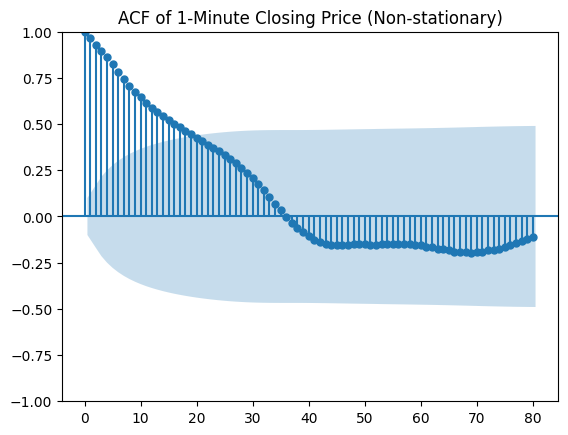

In [158]:


# 1. Create lagged PRICE (not very useful scientifically)
# df["Close_lag1"] = df["Close"].shift(1)
df["Close_lag5"] = df["Close"].shift(5)
# df["Close_lag10"] = df["Close"].shift(10)

# 2. Create RETURNS (the important feature)
# df["ret"] = df["Close"].pct_change()

df = df.dropna()  # remove initial NaNs

# 3. ACF of PRICE (always shows slow decay)
plt.figure(figsize=(15,4))
plot_acf(df["Close"], lags=80)
plt.title("ACF of 1-Minute Closing Price (Non-stationary)")
plt.show()

# # 4. ACF of RETURNS (meaningful)
# plt.figure(figsize=(15,4))
# plot_acf(df["ret"], lags=60)
# plt.title("ACF of 1-Min Returns (Stationary)")
# plt.show()


In [159]:

# df["log_ret"] = np.log(df["Close"]).diff()   # LOG returns

# df = df.dropna()  # remove NaNs created by shift/diff

# # 4. ACF of LOG RETURNS (the meaningful stationary series)

# plt.figure(figsize=(15,4))
# plot_acf(df["log_ret"], lags=60)
# plt.title("ACF of 1-Minute Log Returns (Stationary)")
# plt.show()


#### Create lagged Features

In [160]:
df

,Ticker,Date,Open,High,Low,Close,Volume,Open Interest,Close_lag5
Time,,,,,,,,,
09:20:59,RELIANCE.NSE,01/08/2025,1390.7,1391.9,1389.7,1391.9,20300,0,1387.9
09:21:59,RELIANCE.NSE,01/08/2025,1392.0,1393.0,1390.4,1391.1,58788,0,1388.4
09:22:59,RELIANCE.NSE,01/08/2025,1391.2,1391.7,1390.0,1391.3,33843,0,1389.0
09:23:59,RELIANCE.NSE,01/08/2025,1391.3,1391.5,1390.0,1390.0,13501,0,1388.9
09:24:59,RELIANCE.NSE,01/08/2025,1390.4,1390.4,1390.0,1390.0,30169,0,1390.8
...,...,...,...,...,...,...,...,...,...
15:51:59,RELIANCE.NSE,01/08/2025,1393.7,1393.7,1393.7,1393.7,1,0,1393.7
15:52:59,RELIANCE.NSE,01/08/2025,1393.7,1393.7,1393.7,1393.7,6,0,1393.7
15:55:59,RELIANCE.NSE,01/08/2025,1393.7,1393.7,1393.7,1393.7,10,0,1393.7


In [161]:
columns_to_drop = ["Ticker", "Date", "Open","High","Low", "Volume", "Open Interest"]
df = df.drop(columns=columns_to_drop)

In [162]:
df

,Close,Close_lag5
Time,,
09:20:59,1391.9,1387.9
09:21:59,1391.1,1388.4
09:22:59,1391.3,1389.0
09:23:59,1390.0,1388.9
09:24:59,1390.0,1390.8
...,...,...
15:51:59,1393.7,1393.7
15:52:59,1393.7,1393.7
15:55:59,1393.7,1393.7


In [163]:
df.corr()

,Close,Close_lag5
Close,1.000000,0.878368
Close_lag5,0.878368,1.000000


In [164]:
df.isna().sum()

Close         0
Close_lag5    0
dtype: int64

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, -1].values


In [167]:
X

array([[1391.9],
       [1391.1],
       [1391.3],
       [1390. ],
       [1390. ],
       [1391. ],
       [1389.2],
       [1389.1],
       [1388.7],
       [1389.5],
       [1389.7],
       [1391.5],
       [1392.6],
       [1394.3],
       [1392.9],
       [1393.4],
       [1394.7],
       [1394.7],
       [1394.6],
       [1394.3],
       [1394.9],
       [1395.3],
       [1395. ],
       [1395.4],
       [1394.6],
       [1394.8],
       [1394.7],
       [1394.4],
       [1395.8],
       [1394.6],
       [1394.9],
       [1395.6],
       [1395.4],
       [1394. ],
       [1392.1],
       [1392.9],
       [1391.8],
       [1392.6],
       [1392.8],
       [1395.4],
       [1397. ],
       [1397.5],
       [1399. ],
       [1400.6],
       [1402.2],
       [1401.8],
       [1402.2],
       [1400.7],
       [1399.6],
       [1400.6],
       [1402. ],
       [1400.7],
       [1401.7],
       [1401.3],
       [1401.4],
       [1401. ],
       [1400.5],
       [1400.3],
       [1400.3

In [168]:
y

array([1387.9, 1388.4, 1389. , 1388.9, 1390.8, 1391.9, 1391.1, 1391.3,
       1390. , 1390. , 1391. , 1389.2, 1389.1, 1388.7, 1389.5, 1389.7,
       1391.5, 1392.6, 1394.3, 1392.9, 1393.4, 1394.7, 1394.7, 1394.6,
       1394.3, 1394.9, 1395.3, 1395. , 1395.4, 1394.6, 1394.8, 1394.7,
       1394.4, 1395.8, 1394.6, 1394.9, 1395.6, 1395.4, 1394. , 1392.1,
       1392.9, 1391.8, 1392.6, 1392.8, 1395.4, 1397. , 1397.5, 1399. ,
       1400.6, 1402.2, 1401.8, 1402.2, 1400.7, 1399.6, 1400.6, 1402. ,
       1400.7, 1401.7, 1401.3, 1401.4, 1401. , 1400.5, 1400.3, 1400.3,
       1400.3, 1401.8, 1402.6, 1402.1, 1402.1, 1401.6, 1402.2, 1402.3,
       1402.4, 1401.5, 1401.8, 1403.7, 1403.8, 1403. , 1403.4, 1403. ,
       1403.6, 1404.4, 1404.8, 1403.3, 1403.4, 1403.5, 1403.3, 1401.4,
       1402. , 1401.9, 1402. , 1400.2, 1401.1, 1400.2, 1400.8, 1399.7,
       1400. , 1400. , 1400.6, 1399.5, 1399.9, 1400.3, 1400.3, 1400.2,
       1400.4, 1401.2, 1401.9, 1402.6, 1402.2, 1401.8, 1401.5, 1401.2,
      

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [171]:
X_train.shape, y_train.shape

((304, 1), (304,))

In [172]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
mean_absolute_error(y_test, model.predict(X_test))

1.4493330612011008

In [175]:
mean_absolute_error(y_test, [y_test.mean()] * len(y_test))

3.114285714285731

In [176]:
mean_absolute_error(y_train,model.predict(X_train))

1.1463446261718635